In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 함수의 계수를 랜덤으로 추출
def random_func(var_num, var_range):
    var_picked = np.random.randint(1, var_range+1, size=var_num)
    print(var_picked)
    return var_picked

# 함숫값 계산
def cal_func(var_list, x_index):
    x_list = np.array([x_index**i for i in range(len(var_list))])
    return sum(var_list*x_list)

# 미분
def grad_func(var_list, x_index):
    lambda_x = 1e-6
    func_val = cal_func(var_list, x_index)
    func_val_lambda = cal_func(var_list, x_index+lambda_x)
    return (func_val_lambda - func_val) / lambda_x

# 경사하강법
def gradient_descent(var_num, var_range, picked_var):
    return_x_list = []
    return_grad_list = []
    
    x_index = 0
    min_grad = np.inf
    alpha = 1e-3
    cnt = 0
    while True:
        if cnt > 200:
            break
            
        grad_at_point = grad_func(picked_var, x_index)
        
        if abs(grad_at_point) < 0.01:
            min_grad = grad_at_point
            print('-----------')
            print(f'x_index : {x_index}')
            print(f'grad_at_point : {grad_at_point}')
            break
            
        if min_grad > abs(grad_at_point):
            print('\n----------- min_grad updated')
            print(f'min_grad : {grad_at_point}')
            print(f'x_index : {x_index}')
            
            return_x_list.append(x_index)
            return_grad_list.append(grad_at_point)
            
            min_grad = abs(grad_at_point)
            x_index -= alpha*grad_at_point
            alpha = 0.2
            
        else:
            print('\n-----------')
            print(f'min_grad : {grad_at_point}')
            print(f'x_index : {x_index}')
            
            return_x_list.append(x_index)
            return_grad_list.append(grad_at_point)
            
            x_index -= alpha*grad_at_point
            
        cnt += 1
        
        
    return round(min_grad, 6), return_x_list, return_grad_list

In [22]:
var_num = 3
var_range = 5
picked_var = random_func(var_num, var_range)

min_grad, returned_x, returned_grad = gradient_descent(var_num, var_range, picked_var)

[3 4 4]

----------- min_grad updated
min_grad : 4.000004000026536
x_index : 0

----------- min_grad updated
min_grad : 3.968003968068956
x_index : -0.004000004000026536

----------- min_grad updated
min_grad : -2.3808023810190093
x_index : -0.7976007976138177

----------- min_grad updated
min_grad : 1.4284814287002234
x_index : -0.3214403214100159

----------- min_grad updated
min_grad : -0.8570888572201341
x_index : -0.6071366071500606

----------- min_grad updated
min_grad : 0.5142533141544448
x_index : -0.43571883570603376

----------- min_grad updated
min_grad : -0.308551988403849
x_index : -0.5385694985369227

----------- min_grad updated
min_grad : 0.18513119348639862
x_index : -0.4768591008561529

----------- min_grad updated
min_grad : -0.11107871689119975
x_index : -0.5138853395534326

----------- min_grad updated
min_grad : 0.06664723084526258
x_index : -0.4916695961751927

----------- min_grad updated
min_grad : -0.03998833841833971
x_index : -0.5049990423442452

----------

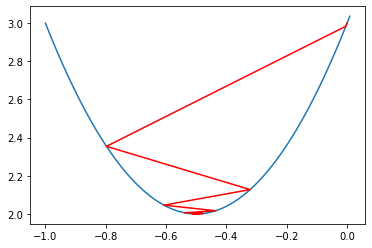

In [24]:
plt_x = np.arange(-1.0, 0.01, 0.001)
plt_y = np.array(list(map(lambda x: cal_func(picked_var, x), plt_x)))

moved_x = returned_x
moved_y = np.array(list(map(lambda x: cal_func(picked_var, x), returned_x)))

plt.plot(plt_x, plt_y)
plt.plot(moved_x, moved_y, c='red')